In [1]:
import pandas as pd

JPT = 1962

## データの読み込みと確認

In [2]:
df_moving_in = pd.read_csv('../data/out/moving_in_2023.csv')
df_moving_out = pd.read_csv('../data/out/moving_out_2023.csv')
df_tokushima_in = pd.read_csv('../data/out/tokushima_moving_in_2023.csv')
df_tokushima_out = pd.read_csv('../data/out/tokushima_moving_out_2023.csv')
df_labor_force_servey = pd.read_csv('../data/out/labor_force_servey.csv')

In [3]:
dfs = [
    df_moving_in.head(),
    df_moving_out.head(),
    df_tokushima_in.head(),
    df_tokushima_out.head(),
    df_labor_force_servey.head()
]

dfs

[  Unnamed: 0           総計    移動の主因者_総数    移動の主因者_就職    移動の主因者_転勤  \
 0      　0～4歳  2388.991360    69.483068     0.000000     0.000000   
 1     　 5～9歳  1465.275282    51.090491     0.000000     0.000000   
 2     10～14歳   792.924420   110.355461     0.000000     0.000000   
 3     15～19歳  3198.264737  2906.027129   590.606076   222.754541   
 4     20～24歳  8922.443350  8644.511079  3829.743206  1551.107307   
 
    移動の主因者_転業・転職  移動の主因者_退職・廃業  移動の主因者_入学・転校  移動の主因者_通勤・通学の便  \
 0      0.000000      0.000000      0.000000        0.000000   
 1      0.000000      0.000000     24.523436        0.000000   
 2      0.000000      0.000000     73.570307        4.087239   
 3     30.654295     32.697914   1561.325405       65.395828   
 4    692.787058    418.942026    467.988898      132.835277   
 
    移動の主因者_結婚・離婚・養子縁組  移動の主因者_子育て環境上  移動の主因者_介護  移動の主因者_住宅事情  移動の主因者_その他  \
 0           0.000000      16.348957   0.000000     2.043620   38.828773   
 1           4.087239      10.218098   0.00000

## データのクリーニングと可視化

<Figure size 1200x600 with 0 Axes>

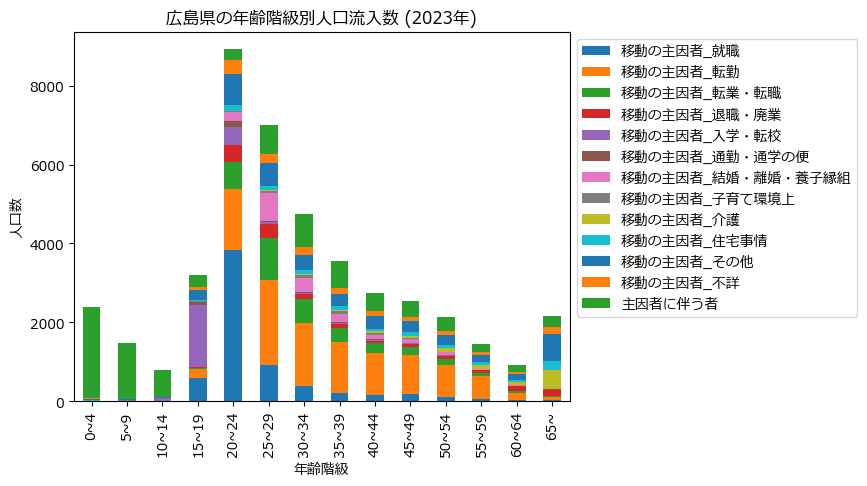

<Figure size 1200x600 with 0 Axes>

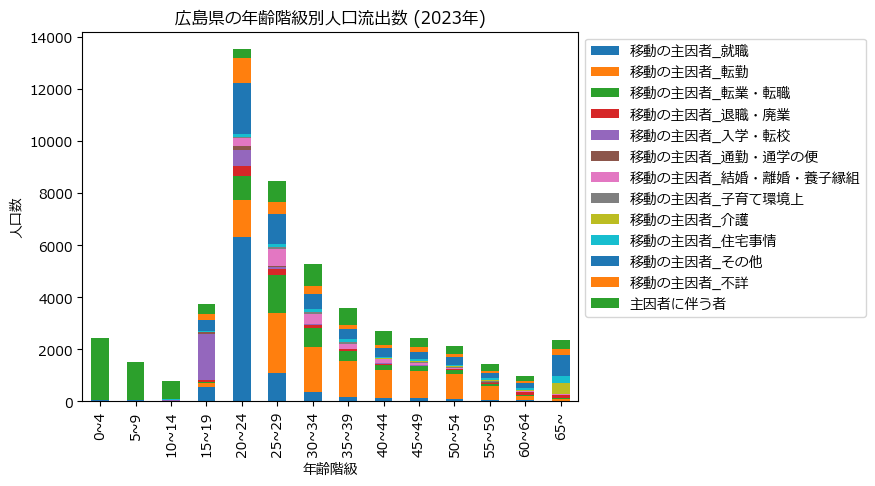

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo"

# 広島県の人口流入データの可視化
plt.figure(figsize=(12, 6))
df_moving_in.drop(columns=['Unnamed: 0', "総計", "移動の主因者_総数"]).plot(kind='bar', stacked=True)
plt.title('広島県の年齢階級別人口流入数 (2023年)')
plt.xticks(range(14), ["0~4", "5~9", "10~14", "15~19", "20~24", "25~29", "30~34", "35~39", "40~44", "45~49", "50~54", "55~59", "60~64", "65~"])
plt.xlabel('年齢階級')
plt.ylabel('人口数')
plt.legend(loc='best', bbox_to_anchor=(1, 1), frameon=True)
plt.show()


# 広島県の人口流出データの可視化
plt.figure(figsize=(12, 6))
df_moving_out.drop(columns=['Unnamed: 0', "総計", "移動の主因者_総数"]).plot(kind='bar', stacked=True)
plt.title('広島県の年齢階級別人口流出数 (2023年)')
plt.xticks(range(14), ["0~4", "5~9", "10~14", "15~19", "20~24", "25~29", "30~34", "35~39", "40~44", "45~49", "50~54", "55~59", "60~64", "65~"])
plt.xlabel('年齢階級')
plt.ylabel('人口数')
plt.legend(loc='best', bbox_to_anchor=(1, 1), frameon=True)
plt.show()

### 広島県の人口流入データ
- 若年層の流入が多く、特に「就職」や「入学・転校」が主要な理由となっている。
- 高齢者層では「子育て環境上」や「介護」などの理由が増えてくる。

### 広島県の人口流出データ
- 若年層の流出が多く、特に「就職」や「転勤」が主要な理由となっている。
- 高齢者層での流出は「住宅事情」や「その他」が理由として挙げられる。

In [5]:
df_moving_in_summary = df_moving_in.drop(columns=['総計', '移動の主因者_総数']).groupby('Unnamed: 0').sum()
df_moving_in_summary

,移動の主因者_就職,移動の主因者_転勤,移動の主因者_転業・転職,移動の主因者_退職・廃業,移動の主因者_入学・転校,移動の主因者_通勤・通学の便,移動の主因者_結婚・離婚・養子縁組,移動の主因者_子育て環境上,移動の主因者_介護,移動の主因者_住宅事情,移動の主因者_その他,移動の主因者_不詳,主因者に伴う者
Unnamed: 0,,,,,,,,,,,,,
10～14歳,0.000000,0.000000,0.000000,0.000000,73.570307,4.087239,0.000000,6.130859,0.000000,0.000000,16.348957,10.218098,682.568960
15～19歳,590.606076,222.754541,30.654295,32.697914,1561.325405,65.395828,18.392577,16.348957,0.000000,24.523436,259.539694,83.788405,292.237609
20～24歳,3829.743206,1551.107307,692.787058,418.942026,467.988898,132.835277,241.147118,24.523436,8.174479,141.009755,776.575463,359.677057,277.932271
25～29歳,917.585219,2160.105960,1066.769452,359.677057,34.741534,36.785154,692.787058,71.526687,4.087239,110.355461,574.257119,247.277976,717.310494
30～34歳,380.113253,1606.285037,594.693315,147.140614,16.348957,24.523436,355.589817,85.832025,16.348957,110.355461,367.851535,214.580062,813.360617
35～39歳,214.580062,1279.305895,361.720676,102.180982,24.523436,16.348957,212.536443,77.657546,28.610675,96.050123,312.673805,151.227853,684.612580
40～44歳,157.358712,1076.987551,253.408835,44.959632,30.654295,14.305337,110.355461,49.046871,36.785154,69.483068,326.979142,106.268221,465.945278
45～49歳,175.751289,987.068286,216.623682,71.526687,16.348957,6.130859,91.962884,34.741534,57.221350,91.962884,273.845032,120.573559,394.418591
50～54歳,108.311841,801.098899,161.445952,77.657546,16.348957,12.261718,65.395828,16.348957,79.701166,85.832025,245.234357,112.399080,359.677057


In [6]:
df_moving_out_summary = df_moving_out.drop(columns=['総計', '移動の主因者_総数']).groupby('Unnamed: 0').sum()
df_moving_out_summary

,移動の主因者_就職,移動の主因者_転勤,移動の主因者_転業・転職,移動の主因者_退職・廃業,移動の主因者_入学・転校,移動の主因者_通勤・通学の便,移動の主因者_結婚・離婚・養子縁組,移動の主因者_子育て環境上,移動の主因者_介護,移動の主因者_住宅事情,移動の主因者_その他,移動の主因者_不詳,主因者に伴う者
Unnamed: 0,,,,,,,,,,,,,
10～14歳,0.000000,0.000000,0.000000,0.000000,52.717765,1.952510,3.905020,5.857529,0.000000,1.952510,19.525098,7.810039,667.758357
15～19歳,544.750238,160.105805,42.955216,58.575294,1784.593970,58.575294,17.572588,9.762549,0.000000,7.810039,421.742120,230.396158,388.549453
20～24歳,6312.464230,1423.379655,911.822083,374.881884,622.850631,167.915844,290.923962,29.287647,9.762549,109.340550,1973.987422,948.919770,347.546747
25～29歳,1089.500476,2298.104052,1468.287380,232.348668,64.432824,31.240157,669.710866,66.385334,15.620079,93.720471,1171.505889,468.602355,784.908945
30～34歳,343.641727,1745.543774,732.191180,97.625491,29.287647,25.382628,376.834394,60.527804,9.762549,119.103099,585.752944,296.781492,861.056828
35～39歳,175.725883,1366.756870,396.359492,48.812745,13.667569,23.430118,175.725883,60.527804,21.477608,95.672981,378.786904,185.488432,624.803141
40～44歳,107.388040,1073.880398,220.633609,29.287647,44.907726,7.810039,119.103099,31.240157,21.477608,48.812745,341.689218,132.770667,499.842512
45～49歳,109.340550,1046.545261,183.535923,23.430118,25.382628,11.715059,76.147883,25.382628,33.192667,80.052902,287.018943,164.010824,372.929375
50～54歳,99.578001,960.634829,123.008118,42.955216,1.952510,9.762549,50.765255,9.762549,56.622785,50.765255,306.544041,95.672981,326.069139


## 労働力調査の分析

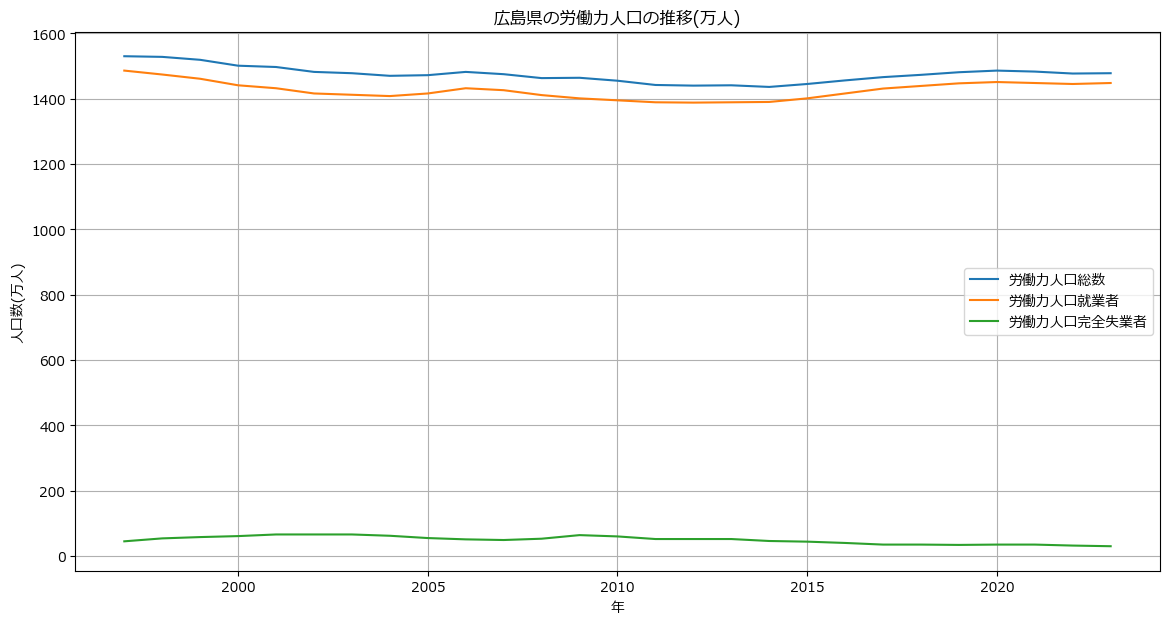

In [7]:
# 労働力調査データの基本統計を確認
labor_force_summary = df_labor_force_servey.describe()

# 広島県の労働力に関する時間的なトレンドをプロット
plt.figure(figsize=(14, 7))
plt.plot(df_labor_force_servey['西暦'], df_labor_force_servey['広島県_労働力人口総数'], label='労働力人口総数')
plt.plot(df_labor_force_servey['西暦'], df_labor_force_servey['広島県_労働力人口就業者'], label='労働力人口就業者')
plt.plot(df_labor_force_servey['西暦'], df_labor_force_servey['広島県_労働力人口完全失業者'], label='労働力人口完全失業者')
plt.xlabel('年')
plt.ylabel('人口数(万人)')
plt.title('広島県の労働力人口の推移(万人)')
plt.legend()
plt.grid(True)
plt.show()


## 徳島県神山町のデータ分析

### 神山町の人口流入・流出データの分析

<Figure size 1400x700 with 0 Axes>

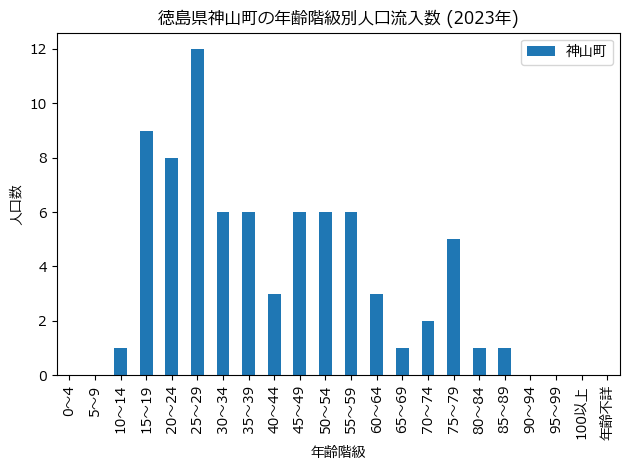

<Figure size 1400x700 with 0 Axes>

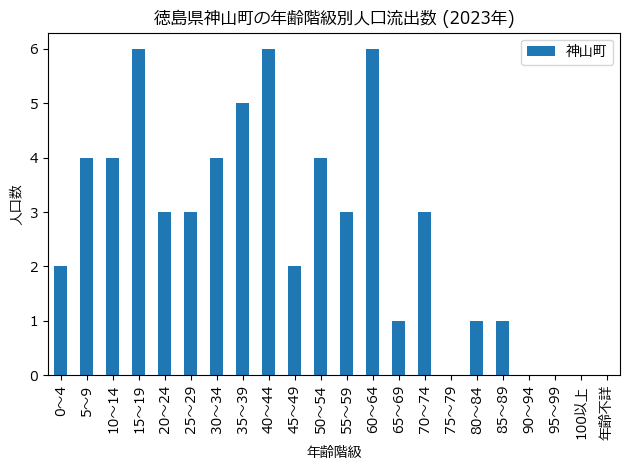

In [8]:
# 神山町の人口流入・流出データの要約
tokushima_in_summary = df_tokushima_in.describe()
tokushima_out_summary = df_tokushima_out.describe()

# 神山町の年齢階級別人口流入・流出データを可視化
plt.figure(figsize=(14, 7))
df_tokushima_in.set_index('5歳階級別　県内市町村間の移動状況').plot(kind='bar', stacked=True)
plt.title('徳島県神山町の年齢階級別人口流入数 (2023年)')
plt.xlabel('年齢階級')
plt.ylabel('人口数')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
df_tokushima_out.set_index('5歳階級別　県内市町村間の移動状況').plot(kind='bar', stacked=True)
plt.title('徳島県神山町の年齢階級別人口流出数 (2023年)')
plt.xlabel('年齢階級')
plt.ylabel('人口数')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### 線形回帰モデルによる人口流入の予測

Mean Squared Error: 252.81877347322407


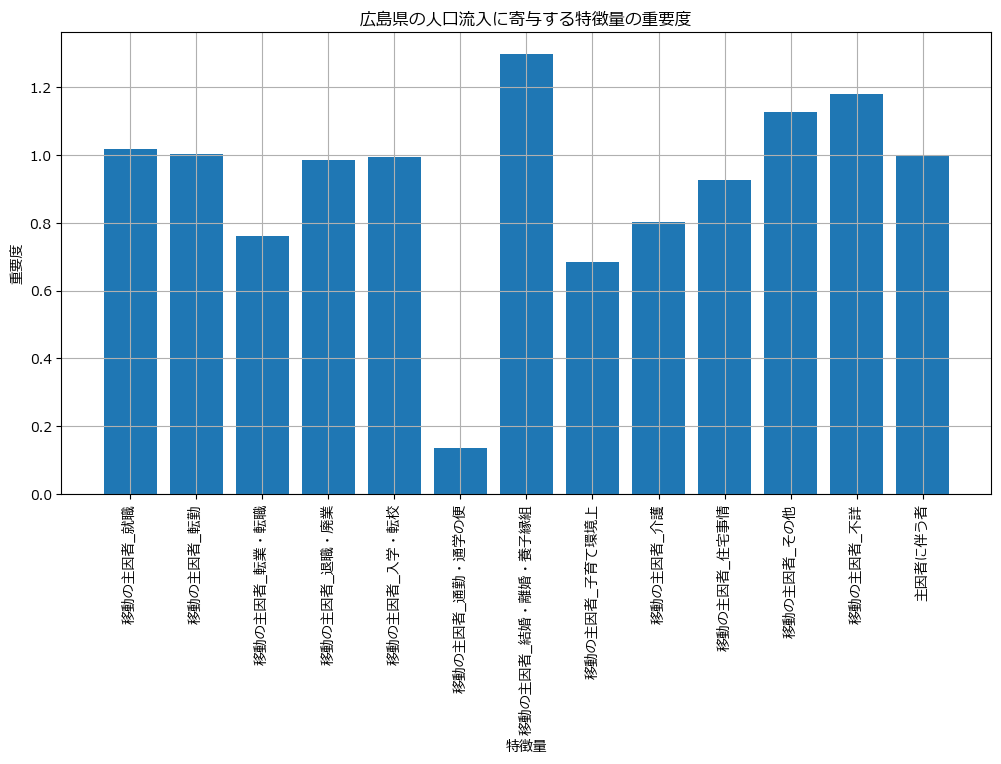

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの準備
X = df_moving_in.drop(columns=['Unnamed: 0', '総計', '移動の主因者_総数'])  # 特徴量
y = df_moving_in['総計']  # 目的変数（流入総数）

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=JPT)

# モデルのトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 重要な特徴量の可視化
importance = model.coef_
features = X.columns

plt.figure(figsize=(12, 6))
plt.bar(features, importance)
plt.title('広島県の人口流入に寄与する特徴量の重要度')
plt.xlabel('特徴量')
plt.ylabel('重要度')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### 線形回帰モデルによる人口流出の予測

Mean Squared Error: 276497.4735914519


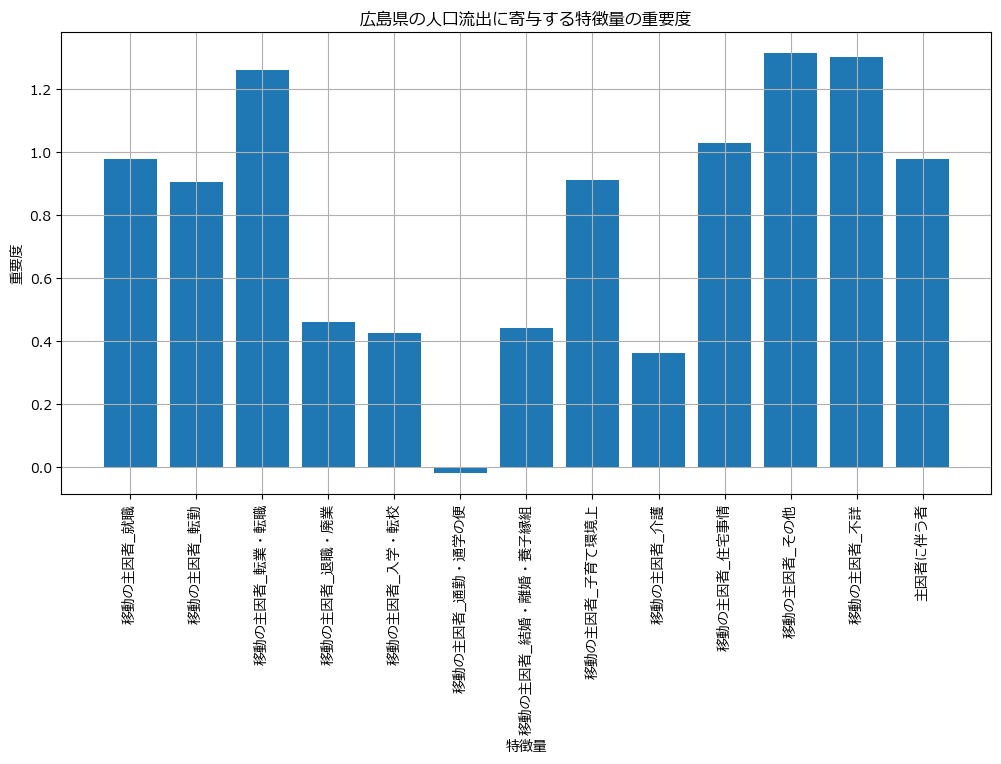

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの準備
X = df_moving_out.drop(columns=['Unnamed: 0', '総計', '移動の主因者_総数'])  # 特徴量
y = df_moving_out['総計']  # 目的変数（流出総数）

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=JPT)

# モデルのトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 重要な特徴量の可視化
importance = model.coef_
features = X.columns

plt.figure(figsize=(12, 6))
plt.bar(features, importance)
plt.title('広島県の人口流出に寄与する特徴量の重要度')
plt.xlabel('特徴量')
plt.ylabel('重要度')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 得られた知見
1. 広島県の人口流動パターン
    - 流入の主な理由
        - 若年層は「就職」や「入学・転校」が多くを占めている。これは広島県が若者にとって進学・就職先として魅力があることを示唆している。
    - 流出の主な理由
        - 若年層は「就職」や「転勤」が主な理由となっている。
        - 高齢者層においては「住宅事情」や「その他」の理由も流出に寄与している。
                - 広島県が一定の年齢層の需要に応えられていない可能性がある。
2. 労働力調査から
    - 失業率が高い時期には流出が増える可能性　→　時系列データで分析すること
3. 徳島県神山町の成功要因
    - 神山町では働き盛りの年齢層で人口流入に成功している。
4. 線形回帰モデルの結果から、流出に対する重要度が特に高い特徴量（「転職」「住宅事情」「子育て環境」「その他」など）に対して対策を講じることで、流出を減少させることができそうだ。

## 2023年Well-Being指数データの読み込みと確認

In [11]:
# Well-Being指数のデータの読み込み
well_being_hiroshima = pd.read_csv('../data/2023年度版(令和5年度版) Well-Being 全国調査_広島県全域（都道府県表示）_客観_utf-8.csv')
well_being_kamiyama = pd.read_csv('../data/2023年度版(令和5年度版) Well-Being 全国調査_徳島県神山町_客観_utf-8.csv')

# データの先頭5行を表示
well_being_hiroshima.set_index("カテゴリ・評価指標", inplace=True)
well_being_hiroshima = well_being_hiroshima.T[5:6]
well_being_kamiyama.set_index("カテゴリ・評価指標", inplace=True)
well_being_kamiyama = well_being_kamiyama.T[5:6]

In [12]:
well_being_hiroshima

カテゴリ・評価指標,医療・福祉,買物・飲食,住宅環境,移動・交通,遊び・娯楽,子育て,初等・中等教育,地域行政,デジタル生活,公共空間,...,納税者あたり課税対象所得,可処分所得,人口あたり生活保護受給者数,高齢世帯の相対的貧困率,労働時間,クリエイティブ産業事業所の構成比,新規設立法人の割合,従業者数あたりコワーキングスペースの数,大学発ベンチャー企業数,特許等出願件数
偏差値,50.3,48.0,45.8,50.4,49.6,49.0,50.8,46.9,60.6,48.0,...,53.4,51.2,55.2,60.4,47.9,52.1,47.7,47.3,49.7,48.3


In [13]:
well_being_kamiyama

カテゴリ・評価指標,医療・福祉,買物・飲食,住宅環境,移動・交通,遊び・娯楽,子育て,初等・中等教育,地域行政,デジタル生活,公共空間,...,正規雇用者比率,高齢者有業率,高卒者進路未定者率,市区町村内で従業している者の割合,創業比率,納税者あたり課税対象所得,クリエイティブ産業事業所構成比,新規設立法人の割合,従業者数あたりコワーキングスペース数,大学発ベンチャー企業数
偏差値,47.5,43.7,NaN,36.9,56.2,51.0,60.9,42.3,38.7,39.5,...,47.5,80.0,25.4,54.9,36.6,38.6,43.2,42.8,79.6,46.0
